##1. 구글 드라이브 Mount

In [1]:
# 구글드라이브 mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/MLDL_telcobiz_embedding_classifier

/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier


## 2. 형태소 분석기 설치

In [3]:
# 형태소분석기 설치 위해 설치파일 복사해오기 
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [4]:
cd Mecab-ko-for-Google-Colab

/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/Mecab-ko-for-Google-Colab


In [5]:
# 형태소분석기 설치(Mecab) 
# !bash install_mecab-ko_on_colab190912.sh
!bash install_mecab-ko_on_colab_light_210108.sh

Installing konlpy.....
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 56.9 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-09-26 13:01:57--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c3:9b0a, 2406:da00:ff00::34cc:ea4a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=ABU9ZyZaEQjBcsDMGVf9gguQEMs%3D&

## 3. SOP / SOR / JIRA 요청서 Merge 
##### Embedding 학습용 데이터 처리 ( SOP : xlsx , SOR : xlsx , JIRA : xml )

In [6]:
cd /content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/

/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data


In [7]:
ls

albert.model.ep9                 sor_jira_dataset.xlsx  WORD2VEC_002
albert.model_weightsonly.ep9     sor_jira_merged.xlsx   WORD2VEC_003
chg_merged.xlsx                  sor_merged.xlsx        WORD2VEC_005
FASTTEXT_001                     telco_corpus.dat       WORD2VEC_006
FASTTEXT_001.vectors_ngrams.npy  telco_corpus.txt       WORD2VEC_007
sop_dataset.xlsx                 testmodel1             WORD2VEC_008
sop_merged.xlsx                  testmodel1.h5          WORD2VEC_009
sor_dataset.xlsx                 WORD2VEC_001


##### 1) 데이터 확인 (shape, column, sample)

In [8]:
import pandas as pd

In [ ]:
input_sop_file_path  = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sop_merged.xlsx'
input_sor_file_path  = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sor_merged.xlsx'
input_sor_jira_file_path  = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sor_jira_merged.xlsx'
input_chg_file_path = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/chg_merged.xlsx'

In [ ]:
output_corpus_path = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/'

In [ ]:
input_file_paths = [ path for path in [input_sop_file_path, input_sor_file_path, input_sor_jira_file_path, input_chg_file_path ]]

In [ ]:
input_file_paths

['/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sop_merged.xlsx',
 '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sor_merged.xlsx',
 '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sor_jira_merged.xlsx',
 '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/chg_merged.xlsx']

In [ ]:
df = [ pd.read_excel(input_file, sheet_name= 0, engine = 'openpyxl') for input_file in input_file_paths ]

In [ ]:
# input data의 shape 확인
# 1. sop  2.sor  3.sor_jira  4.chg
for i in df :
  print(i.shape)

(123509, 2)
(106747, 3)
(4458, 2)
(27522, 2)


In [ ]:
# input data의 columns 확인
# 1. sop  2.sor  3.sor_jira  4.chg
for i in df :
  print(i.columns)

Index(['상세내역', '조치내역'], dtype='object')
Index(['제목', '요청사유', '요청내역'], dtype='object')
Index(['summary', 'description'], dtype='object')
Index(['제목', '변경내용'], dtype='object')


In [ ]:
# input data의 sample확인 (데이터 형태 확인)
# 1. sop  2.sor  3.sor_jira  4.chg
for i in df :
  print(i[:5])

                                                상세내역                                               조치내역
0  ■ 자산테그 : \n■ 근무위치/요청자 : 시청 NH농협생명빌딩 쪽 / 010-37...  201901210920\t[SKT장애의심]F&U신용정보본사 19층 전체 네트워크 연...
1  고객상담화면에서 번호조회시 [ZINBSCNS00110_TR81][APTIMEOUT]...  - ISAC 문의 접수 현황\n[Bswing]스윙 로그인 이후 조회 업무시 지연 :...
2  할인반환금 조회시 조회가 되었다 안되었다반복된다고 문의\n\n화면명 : 유선할인반환...  [SKB심각도3경과-IT종합상황실]\n\n● 내용 : 할인반환금 조회화면에서 조회시...
3              T world, T 멤버십, T Direct 등 TID 로그인 불가  201901301130\t[SKT 통합품질감시] \n● 서비스 : \n[인터넷] M...
4  갤럭시워치 신규 가입 시 오류로 취소 요청된 건입니다. 확인하시고 재조회 후 처리하...  [SKT심각도3경과-IT종합상황실]\n\n● 내용 : 서비스신규가입화면에서 갤럭시워...
                                              제목  ...                                               요청내역
0          소속영업장 변경 요청(SKB사내유치본점 -＞ 엘에스통신-채널고객팀)  ...  요청유형:자료수정,요청유형상세:PRM,검토/승인자성명:홍도희,검토/승인자사번:170...
1                    전자계약을 위한 파일 변환 및 시스템 업로딩 요청  ...  요청유형:자료수정,요청유형상세:PRM,검토/승인자성명:송창훈,검토/승인자사번:117...
2                    전자계약을 위한 파일 변환 및 시스템 업로딩 요청  ...  요청유형:자

2) 1개의 column으로 데이터 합치기

In [10]:
def change_to_vertical(df) :
    concat_df = pd.concat( [df.iloc[:,i] for i in range(df.shape[1])] )
    return concat_df.drop_duplicates(keep='first', inplace=False)

In [ ]:
corpus_list = []

for data in df : 
  corpus_list.append(change_to_vertical(data))  

In [11]:
# 1개의 열로 데이터 합쳐졌는지 확인
for corpus in corpus_list :
  print(corpus.shape)

NameError: ignored

In [ ]:
# 한 개 열로 합치기 
merge_corpus = []

for corpus in corpus_list :
  for i, text in enumerate(corpus) :
    merge_corpus.append(text)

In [ ]:
# 위에 shape[0] 합계랑 동일한지 확인 
# merge_corpus[0] type : string 
len(merge_corpus)

547197

3) 데이터 정제하기 
   - 문장 나누기
   - NULL인 데이터 삭제
   - 특수문자 제거 
   - 한자 제거
   - 휴대폰 번호 제거 (숫자 제거) 
   - 영어 제거 

In [ ]:
# 1. NULL인 데이터 삭제 
# NULL인 데이터 개수 확인 
cnt =0
for corpus in merge_corpus :
  if corpus is None  :
    cnt+=1

In [ ]:
# 확인 결과 NULL인 문자열 개수 0개 
cnt

0

In [ ]:
# 혹시 모르니까 NULL인 데이터 삭제 수행
# 삭제 전 corpus 개수 확인 
len(merge_corpus)

547197

In [ ]:
# 삭제 수행
merge_corpus = [corpus for corpus in merge_corpus if corpus]

In [ ]:
# 삭제 수행 후 개수 확인
len(merge_corpus)

547197

* 데이터 정제 함수 정의 시작



In [9]:
import regex

In [10]:
# 0. 콤마를 스페이스로 대체하는 함수 
def replace_comma_to_space(sentence: str = None) -> str:
    sentence = re.sub("[,]", " ", sentence)
    return sentence

In [11]:
# 1. 스페이스만 있는 문자열 data 제거하기 
# ex) x = ['abc', 'def' , ' ', 'xyz'] -> x = ['abc', 'def', 'xyz'] 
def remove_space_only_data(doc) :
 sentences = []
 for sentence in doc : 
   if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기 
       if sentence : 
         sentences.append(sentence) # 공백 지우기 
 return sentences

In [12]:
# 2. 문장 나누기 함수
def split_doc_to_sentences(doc) : 
  if doc is not None and len(doc.strip()) > 1 :
    sentences = regex.split("([.?!])?[\n]+|[.?!] ", doc) # 문장으로 나누기 
    sentences = [sentence for sentence in sentences if sentence] # 공백 지우기 
    return  sentences

In [13]:
# 3. 특수 문자 삭제 
import re

# 특수 문자열 정의
removal_list =  "‘, ’, ◇, ‘, ”,  ’, ', ·, \“, ·, △, ●, ■, (, ), \", >>, `, /, -,∼,=,ㆍ<,>, 【,】, …, ◆,%"
EMAIL_PATTERN = re.compile(r'''(([a-zA-Z0-9._%+-]+)@([a-zA-Z0-9.-]+)(\.[a-zA-Z]{2,4}))''', re.VERBOSE)
URL_PATTERN = re.compile("(ftp|http|https)?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", re.VERBOSE)
MULTIPLE_SPACES = re.compile(' +', re.UNICODE)

In [14]:
!pip install hanja

     |████████████████████████████████| 120 kB 7.8 MB/s 
     |████████████████████████████████| 265 kB 47.4 MB/s 
     |████████████████████████████████| 280 kB 52.8 MB/s 
     |████████████████████████████████| 242 kB 69.3 MB/s 
     |████████████████████████████████| 242 kB 69.4 MB/s 
     |████████████████████████████████| 242 kB 72.0 MB/s 
     |████████████████████████████████| 229 kB 29.3 MB/s 
     |████████████████████████████████| 229 kB 70.4 MB/s 
INFO: pip is looking at multiple versions of pytest-cov to determine which version is compatible with other requirements. This could take a while.
  Created wheel for hanja: filename=hanja-0.13.3-py3-none-any.whl size=128423 sha256=09585c2432aa49ad1f1f429c60abd1efc3ca4036112e7acb52ff105b28319a3b
  Stored in directory: /root/.cache/pip/wheels/70/08/88/f9cd32ddb92f5c3061cf16f068c842dc558d2f66a9c943b51a
  Created wheel for pyyaml: filename=PyYAML-5.1.2-cp37-cp37m-linux_x86_64.whl size=44117 sha256=ea881c1ba2c7f128f119193221c7f546dd763

In [15]:
import hanja 

def cleansing_special(sentence: str = None) -> str:
    """
    특수문자를 전처리를 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    sentence = re.sub("[.,\'\"’‘”“!?]", "", sentence)
    sentence = re.sub("[^가-힣0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    
    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = ' '.join(sentence.split())  
    
    return sentence

def cleansing_numbers(sentence: str = None) -> str:
    """
    숫자를 전처리(delexicalization) 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    
    sentence = re.sub('[0-9]+', ' ', sentence)
    sentence = re.sub('NUM\s+', " ", sentence)
    sentence = re.sub('[NUM]+', " ", sentence)
    sentence = ' '.join(sentence.split())  

    return sentence

def cleansing_other(sentence: str = None) -> str:
    """
    문장을 전처리 (이메일, URL, 공백 등 제거) 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    sentence = re.sub(EMAIL_PATTERN, ' ', sentence)
    sentence = re.sub(URL_PATTERN, ' ', sentence)
    sentence = re.sub(MULTIPLE_SPACES, ' ', sentence)
    sentence = sentence.replace(", )", "")
    sentence = ' '.join(sentence.split())  
        
    return sentence

def cleansing_chinese(sentence: str = None) -> str:
    """
    한자를 변환하는 전처리를 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    # chinese character를 앞뒤로 괄호가 감싸고 있을 경우, 대부분 한글 번역임
    sentence = re.sub("\([\u2E80-\u2FD5\u3190-\u319f\u3400-\u4DBF\u4E00-\u9FCC\uF900-\uFAAD]+\)", "", sentence)
    # 다른 한자가 있다면 한글로 치환
    if re.search("[\u2E80-\u2FD5\u3190-\u319f\u3400-\u4DBF\u4E00-\u9FCC\uF900-\uFAAD]", sentence) is not None:
        sentence = hanja.translate(sentence, 'substitution')
    sentence = ' '.join(sentence.split())  
    
    return sentence
    
def cleansing_english(sentence: str = None) -> str:
    """
    영어 전처리 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    sentence = re.sub("[^가-힣0-9\\s]", " ", sentence)
    sentence = re.sub("\s+", " ", sentence)
    sentence = ' '.join(sentence.split())  
    
    return sentence

def preprocess_sent(sentence: str = None) -> str:
    """
    모든 전처리를 수행 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    sent_clean = sentence
    sent_clean = cleansing_other(sent_clean)
    sent_clean = cleansing_chinese(sent_clean)
    sent_clean = cleansing_special(sent_clean)
    sent_clean = cleansing_numbers(sent_clean)
    #sent_clean = cleansing_english(sent_clean)
    sent_clean = re.sub('\s+', ' ', sent_clean)  

    return sent_clean

In [ ]:
print("******************************************* 문장 분리 & 정제처리 잘 되는지 sample로 1개 확인해보기 ******************************************* \n")
test_str = merge_corpus[0]
print (" ------------------------------------------ 1. 원본 데이터 (merge_corpus[0]) ------------------------------------------")
print(test_str, "\n")


test_str = split_doc_to_sentences(test_str)
print (" ------------------------------------------ 2. 문장 분리 후 데이터  ------------------------------------------")
for i in test_str : print(i)
print("\n")

cleansed_text = []
for test in test_str :
   test = preprocess_sent(test)
   if test : # 공백 지우기 
      cleansed_text.append(test)
cleansed_text

print (" ----------------------------- 3. 특수문자, 영어, 이메일, 숫자 등 제거 후 데이터  -----------------------------")
for i in cleansed_text : print (i)
print("\n")


******************************************* 문장 분리 & 정제처리 잘 되는지 sample로 1개 확인해보기 ******************************************* 

 ------------------------------------------ 1. 원본 데이터 (merge_corpus[0]) ------------------------------------------
■ 자산테그 : 
■ 근무위치/요청자 : 시청 NH농협생명빌딩 쪽 / 010-3724-5304
■ OA기기 정보 : 
■ IP주소 : 
■ 증상/ISAC 조치 내용 : [네트워크]유선]_F&U신용정보본사 19층 전체 네트워크 연결 불가
1. 대략 100명정도 상담원 있는 층 내 유선 네트워크 및 IP전화기도 연결이 안되는 상태 

 ------------------------------------------ 2. 문장 분리 후 데이터  ------------------------------------------
■ 자산테그 : 
■ 근무위치/요청자 : 시청 NH농협생명빌딩 쪽 / 010-3724-5304
■ OA기기 정보 : 
■ IP주소 : 
■ 증상/ISAC 조치 내용 : [네트워크]유선]_F&U신용정보본사 19층 전체 네트워크 연결 불가
1
대략 100명정도 상담원 있는 층 내 유선 네트워크 및 IP전화기도 연결이 안되는 상태


 ----------------------------- 3. 특수문자, 영어, 이메일, 숫자 등 제거 후 데이터  -----------------------------
자산테그
근무위치 요청자 시청 H농협생명빌딩 쪽
OA기기 정보
IP주소
증상 ISAC 조치 내용 네트워크 유선 F 신용정보본사 층 전체 네트워크 연결 불가
대략 명정도 상담원 있는 층 내 유선 네트워크 및 IP전화기도 연결이 안되는 상태




In [ ]:
# merge_corpus 전체 데이터 대상으로 데이터로 문장 분리 & 특수 문자 제거 

In [ ]:
# 0) 원본 데이터 복제 
bf_cleanse_corpus = merge_corpus

In [ ]:
bf_cleanse_corpus[0]

'■ 자산테그 : \n■ 근무위치/요청자 : 시청 NH농협생명빌딩 쪽 / 010-3724-5304\n■ OA기기 정보 : \n■ IP주소 : \n■ 증상/ISAC 조치 내용 : [네트워크]유선]_F&U신용정보본사 19층 전체 네트워크 연결 불가\n1. 대략 100명정도 상담원 있는 층 내 유선 네트워크 및 IP전화기도 연결이 안되는 상태'

In [16]:
#1) 문장 분리 시작
split_corpus = []
cnt = 0

for sentence in bf_cleanse_corpus :
   if cnt == 0 : 
     print("문장 분리 작업 시작 ---------------")
   cnt +=1 
   if cnt % 10000 == 0 : 
      print(cnt, "번째 문장 수행 중")
   try :
        if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기 
           sentence = replace_comma_to_space(sentence) ## 콤마 먼저 삭세 처리. 콤마 때문에 리스트로 인식됨
           sentence = split_doc_to_sentences(sentence) ## 문장 분리
           split_corpus.append(sentence)  
   except :
        print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
        print(sentence)
        continue
   
   

print("첫번째 데이터 확인 : ",split_corpus[0] )

NameError: ignored

In [ ]:
# 2) 특수문자, 영어, 한자, 숫자, 이메일 등 제거 시작 
# split_corpus : 문장 분리된 corpus
# cleanse_corpus : 문장 분리 + 특수문자 제거한 corpus
cleanse_corpus = []
cnt = 0
cnt2 = 0

for sentences in split_corpus :
  if cnt == 0 : 
     print("특수 문자 제거 작업 시작 ---------------")
  if cnt % 10000 == 0 : 
     print("cnt : ",cnt, "번째 문장 수행 중")   
  try :    
    for sentence in sentences :
      cnt2 +=1
      #if cnt>180000 :
      #  print("cnt : ",cnt, "번째 문장 수행 중")
      #  print("cnt2 : ",cnt2, "번째 문장 수행 중")
      try :   
          sentence = preprocess_sent(sentence) 
          if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기 
             if sentence : 
                cleanse_corpus.append(sentence) # 공백 지우기 
      except : 
          print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
          print(f'      {cnt2} 번째 데이터에 문제가 있어 skip!')
          print(sentence)
          continue
  except : 
     print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
     print(sentence)
     continue
  
  cnt +=1 
  cnt2 = 0
print("첫번째 데이터 확인 : ",cleanse_corpus[0] )

특수 문자 제거 작업 시작 ---------------
cnt :  0 번째 문장 수행 중
cnt :  10000 번째 문장 수행 중
cnt :  20000 번째 문장 수행 중
cnt :  30000 번째 문장 수행 중
cnt :  40000 번째 문장 수행 중
cnt :  50000 번째 문장 수행 중
cnt :  60000 번째 문장 수행 중
cnt :  70000 번째 문장 수행 중
cnt :  80000 번째 문장 수행 중
cnt :  90000 번째 문장 수행 중
cnt :  100000 번째 문장 수행 중
cnt :  110000 번째 문장 수행 중
cnt :  120000 번째 문장 수행 중
cnt :  130000 번째 문장 수행 중
cnt :  140000 번째 문장 수행 중
cnt :  150000 번째 문장 수행 중
cnt :  160000 번째 문장 수행 중
cnt :  170000 번째 문장 수행 중
cnt :  180000 번째 문장 수행 중
cnt :  190000 번째 문장 수행 중
cnt :  200000 번째 문장 수행 중
cnt :  210000 번째 문장 수행 중
cnt :  220000 번째 문장 수행 중
cnt :  230000 번째 문장 수행 중
cnt :  240000 번째 문장 수행 중
cnt :  250000 번째 문장 수행 중
cnt :  260000 번째 문장 수행 중
cnt :  270000 번째 문장 수행 중
cnt :  280000 번째 문장 수행 중
cnt :  290000 번째 문장 수행 중
cnt :  300000 번째 문장 수행 중
cnt :  310000 번째 문장 수행 중
cnt :  320000 번째 문장 수행 중
cnt :  330000 번째 문장 수행 중
cnt :  340000 번째 문장 수행 중
cnt :  350000 번째 문장 수행 중
cnt :  360000 번째 문장 수행 중
cnt :  370000 번째 문장 수행 중
cnt :  380000 번째 문장 수행 중
cnt :  3

## 4. Tokenize 적용 (형태소 분리)
- Mecab 이용하여 형태소 분리
- 형태소 분리 후 txt 파일로 telco_corpus 저장
- 단어로 분리 및 불용어 제거 처리까지 적용 

In [ ]:
# 3) Mecab 형태소 분석기 사용하여 형태소 분리

In [17]:
import konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
try:
    import eunjeon
    from eunjeon import Mecab
except:
    from konlpy.tag import Mecab

from sklearn.preprocessing import normalize
import nltk
import matplotlib.pyplot as plt
    

In [18]:
def get_tokenizer(tokenizer_name):
    if tokenizer_name == "komoran":
        tokenizer = Komoran()
    elif tokenizer_name == "okt":
        tokenizer = Okt()
    elif tokenizer_name == "mecab":
        tokenizer = Mecab()
    elif tokenizer_name == "hannanum":
        tokenizer = Hannanum()
    else:
        tokenizer = Mecab()
        
    return tokenizer

In [19]:
def get_tags(tagger):
    if isinstance(tagger, konlpy.tag._okt.Okt):
        return ['Alpha', 'Noun', 'Adjective']
    elif isinstance(tagger, konlpy.tag._kkma.Kkma):
        return ['NN', 'NNG', 'NNB', 'NNM',' NNP', 'NP', 'NR', 'OH', 'OL', 'ON', 'VA', 'VXA']
    elif isinstance(tagger, konlpy.tag._komoran.Komoran):
        return ['NNG', 'NNB', 'NNP', 'NP', 'NR', 'SH', 'SL', 'SN', 'VA']
    else:
        try:
            if isinstance(tagger, konlpy.tag._mecab.Mecab):
                return ['VA', 'NNG', 'NNB', 'NNBC', 'NNP', 'NP', 'NR', 'SH', 'SL', 'SN', 'VA']
        except:
            if isinstance(tagger, eunjeon._mecab.Mecab):
                return ['VA', 'NNG', 'NNB', 'NNBC', 'NNP', 'NP', 'NR', 'SH', 'SL', 'SN', 'VA']
            else:
                raise ValueError(f'invalid tagger!! {tagger.__class__}')


In [20]:
# pos : 태그 같이 표시할지 여부 
# tag_filer_aply : tokenizer별로 선정한 tag만 골라서 담을지 여부 
def tokenize(tokenizer_name, original_sentences, pos=False, tag_filter_aply=False):
    tokenizer = get_tokenizer(tokenizer_name)
    tag_list = get_tags(tokenizer)

    tokenized_sent = []

    for i, s in enumerate(original_sentences) :
      try : 
        if pos:          
          tokens = tokenizer.pos(s)
          if tag_filter_aply : 
            tokens = [ morph + "/" + tag for morph, tag in tokens if tag in tag_list ]
          else : 
            tokens = [ morph + "/" + tag for morph, tag in tokens ]
        else:
          if tag_filter_aply : 
            tokens = tokenizer.pos(s)
            tokens = [ morph.strip() for morph, tag in tokens if tag in tag_list ]
          else : 
            tokens = tokenizer.morphs(s)
        
      except : 
            print(f'{i} 번째 데이터에 문제가 있어 skip!')
            continue
      
      tokenized_sent.append( ' '.join(tokens))
      #if i % 100000 == 0 : 
        #print(f'총 {len(original_sentences)}개 중 {i} 번째 데이터에 처리 완료!' )      
    
    #print('전체 데이터 tokenize 처리 완료!' )  
    return tokenized_sent


In [21]:
# 4) 정제된 데이터를 txt 파일로 저장하는 함수 정의
from typing import List
from tqdm import tqdm
import os

def write_to_txt(sentences: List[str] = None,
                 filename: str = None):
    with open(filename, 'w', encoding='utf-8') as f:
        for sent in tqdm(sentences):
            f.write(sent+'\n')
    f.close()
    print(f'Data saved at {filename}')

In [ ]:
# 정제된 데이터(cleanse_corpus)를 형태소 분석(tokenize)처리
# tokenize 적용 전 :  ['자산테그', '근무위치 요청자 시청 H농협생명빌딩 쪽', 'OA기기 정보', 'IP주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용정보본사 층 전체 네트워크 연결 불가']
# tokenize 적용 후 :  ['자산', '근무 위치 요청 시청 H 농협 생명 빌딩 쪽', 'OA 기기 정보', 'IP 주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용 정보 본사 층 전체 네트워크 연결 불가', '명정 상담원 층 내 유선 네트워크 IP 전화기 연결 상태', '고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 문의', '고객 상담 화면 고객 번호 조회 시 로딩 길 이후 고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 확인 부탁', '요청 김지현', '할인 반 환금 조회 시 조회 반복 문의', '화면 명 유선 할인 반 환금 조회', '서비스 번호', '장애 현상', '할인 반 환금 조회 화면 조회 B TV 자료 수신 지연 후 조회 팝업', '조회 반복', '해당 서비스 해당 내용 전체 그렇', '청자 자영', 'T world T 멤버십 T Direct 등 TID 로그인 불가']

tokenized_corpus = []
# tokenize 처리
tokenized_corpus = tokenize("mecab", cleanse_corpus, pos = False, tag_filter_aply= True)


In [ ]:
# dat 파일로 저장 처리(telco_corpus.dat) 
# 정제된 데이터를 dat 파일로 저장 (telco_corpus.dat)
write_to_txt(tokenized_corpus, os.path.join(output_corpus_path, 'telco_corpus.dat'))

print("tokenize 적용 전 : ", cleanse_corpus[:5]) 
print("tokenize 적용 후 : ", tokenized_corpus[:20]) 

100%|██████████| 2173300/2173300 [00:02<00:00, 944923.35it/s]

Data saved at /content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/telco_corpus.dat
tokenize 적용 전 :  ['자산테그', '근무위치 요청자 시청 H농협생명빌딩 쪽', 'OA기기 정보', 'IP주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용정보본사 층 전체 네트워크 연결 불가']
tokenize 적용 후 :  ['자산', '근무 위치 요청 시청 H 농협 생명 빌딩 쪽', 'OA 기기 정보', 'IP 주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용 정보 본사 층 전체 네트워크 연결 불가', '명정 상담원 층 내 유선 네트워크 IP 전화기 연결 상태', '고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 문의', '고객 상담 화면 고객 번호 조회 시 로딩 길 이후 고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 확인 부탁', '요청 김지현', '할인 반 환금 조회 시 조회 반복 문의', '화면 명 유선 할인 반 환금 조회', '서비스 번호', '장애 현상', '할인 반 환금 조회 화면 조회 B TV 자료 수신 지연 후 조회 팝업', '조회 반복', '해당 서비스 해당 내용 전체 그렇', '청자 자영', 'T world T 멤버십 T Direct 등 TID 로그인 불가']


리뷰의 최대 길이 : 2002
리뷰의 평균 길이 : 27.24686145493029


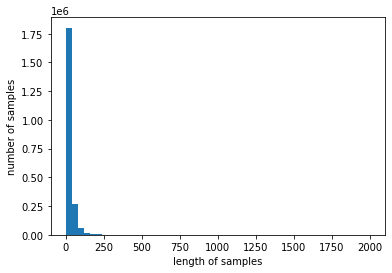

In [ ]:
# corpus 내 sentence 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_corpus))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_corpus))/len(tokenized_corpus))
plt.hist([len(s) for s in tokenized_corpus], bins= 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 5. Word2vec 모델 만들기

In [22]:
import multiprocessing

In [23]:
WORKERS = multiprocessing.cpu_count() - 1

In [24]:
WORKERS

1

In [25]:
from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import numpy as np

In [26]:
class callback(CallbackAny2Vec): 
  """Callback to print loss after each epoch.""" 
  def __init__(self): 
    self.epoch = 0 
    self.loss_to_be_subed = 0
  
  def on_epoch_end(self, model): 
    loss = model.get_latest_training_loss() 
    loss_now = loss - self.loss_to_be_subed 
    self.loss_to_be_subed = loss 
    print('Loss after epoch {}: {}'.format(self.epoch, loss_now)) 
    self.epoch += 1


In [27]:
corpora_file_name = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/telco_corpus.dat'

In [28]:
corpus = [sentence.strip().split(' ') for sentence in open(corpora_file_name, 'r', encoding='utf-8').readlines()]

In [29]:
corpus[:3]

[['자산'],
 ['근무', '위치', '요청', '시청', 'H', '농협', '생명', '빌딩', '쪽'],
 ['OA', '기기', '정보']]

In [30]:
model = Word2Vec(sentences= corpus, 
                 size=100, 
                 window=5, 
                 min_count=5, 
                 workers= WORKERS, 
                 iter = 20,
                 callbacks=[callback()],
                 compute_loss = True,
                 sg=1)

Loss after epoch 0: 64027312.0
Loss after epoch 1: 10815936.0
Loss after epoch 2: 8228744.0
Loss after epoch 3: 8132344.0
Loss after epoch 4: 8026272.0
Loss after epoch 5: 7908680.0
Loss after epoch 6: 7803888.0
Loss after epoch 7: 7676136.0
Loss after epoch 8: 7565616.0
Loss after epoch 9: 4032800.0
Loss after epoch 10: 0.0
Loss after epoch 11: 0.0
Loss after epoch 12: 0.0
Loss after epoch 13: 0.0
Loss after epoch 14: 0.0
Loss after epoch 15: 0.0
Loss after epoch 16: 0.0
Loss after epoch 17: 0.0
Loss after epoch 18: 0.0
Loss after epoch 19: 0.0


In [31]:
model.most_similar('청구', topn = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('구금', 0.6606399416923523),
 ('수납', 0.6217106580734253),
 ('청구서', 0.6133018732070923),
 ('요금', 0.6077569127082825),
 ('swgpa', 0.6041613817214966),
 ('금대', 0.5843673348426819),
 ('invo', 0.5801141858100891),
 ('원차', 0.5790654420852661),
 ('가세미', 0.5742112994194031),
 ('미납', 0.5660558938980103)]

In [32]:
model.wv.vectors.shape

(34167, 100)

In [33]:
model.wv.vectors[0]

array([-0.0247478 ,  0.12930596,  0.21824373,  0.35090157, -0.0037443 ,
       -0.05110818,  0.5931616 ,  0.0818655 , -0.2283409 ,  0.10969422,
       -0.05859095, -0.09615338,  0.19484216,  0.0699943 , -0.10552097,
       -0.10602525, -0.27299687, -0.2078164 ,  0.0100883 , -0.21854635,
       -0.20472904, -0.14815727, -0.1001784 ,  0.21903577, -0.2961076 ,
       -0.09714988, -0.02328257,  0.23427653,  0.1821452 ,  0.53150487,
       -0.14555228,  0.16712442, -0.10948835, -0.07293839,  0.26906887,
       -0.22284438, -0.02968316, -0.31819522,  0.41106403, -0.10851107,
       -0.05480831, -0.25623026, -0.00917649,  0.24432817,  0.0860344 ,
        0.11350627,  0.40948898, -0.34178934, -0.2662946 ,  0.10332125,
       -0.32375938,  0.22420825,  0.28502223, -0.1769454 , -0.29893383,
       -0.02126601, -0.06451623,  0.4495445 , -0.27388936, -0.2995394 ,
       -0.00744116, -0.03614368, -0.3020549 ,  0.17214684, -0.03564352,
        0.45909697,  0.07626879,  0.25506774, -0.18249159, -0.32

In [34]:
vocab_size = model.wv.vectors.shape[0]
embedding_size = model.wv.vectors.shape[1]
index2word = model.wv.index2word
weight = model.wv.vectors

In [35]:
model.wv.vectors.shape


(34167, 100)

In [36]:
UNK_TOKEN = '<UNK>'
PAD_TOKEN = '<PAD>'

In [37]:
index2word.append( UNK_TOKEN )
index2word.append( PAD_TOKEN ) 

In [38]:
from scipy.stats import truncnorm

In [39]:
mean=0
sd=1
low=-1
upp=1

In [40]:
# unknown, padding 토큰 추가
# weight = model.wv.vectors
model.wv.vectors = np.append(weight, truncnorm( (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd ).rvs(embedding_size * 2).reshape(2, embedding_size), axis=0)        

In [41]:
weight = model.wv.vectors

In [42]:
from sklearn.preprocessing import normalize

In [43]:
model.wv.norm_weight = normalize(weight, norm='l2', axis=1)

In [44]:
word2index = {w:i for i, w in enumerate(index2word)}

In [45]:
print( len(index2word) )
print( len(word2index) )
print( len(weight) )

print( index2word[200] )
print( word2index['청구'] )
print( weight[2583] )
print( model.wv.norm_weight[2583] )

34169
34169
34169
생성
65
[-9.42440510e-01  1.31427526e+00 -9.92992699e-01  1.33383858e+00
 -8.98029208e-01 -7.96100557e-01  1.22036552e+00  3.17135543e-01
 -6.57561958e-01  2.53504366e-01 -7.36668706e-01 -6.49219006e-02
 -3.56283069e-01 -3.26700538e-01 -1.04639328e+00  1.35611832e+00
 -1.00085878e+00 -9.62014973e-01 -4.94231284e-01 -1.01220727e+00
 -8.86415064e-01 -1.49952469e-03 -2.01693249e+00 -2.80225039e-01
  1.97195366e-01  1.04131174e+00  2.07723126e-01  9.10003185e-01
 -3.74706425e-02  2.29831487e-01  2.13709950e+00  7.71509171e-01
 -9.12785590e-01 -9.29225385e-01 -7.98269510e-01 -1.29471207e+00
 -1.59084108e-02 -7.35119581e-01  1.04480565e+00 -2.50522614e-01
 -8.74278545e-01  2.36136302e-01  3.54578942e-01 -2.68794537e-01
  4.62480694e-01  6.01619668e-02  1.22517657e+00 -1.70365691e+00
 -1.00929701e+00  1.29087591e+00 -1.14123166e+00  4.60566074e-01
 -1.16999817e+00 -1.55250356e-02 -3.65792722e-01  1.70934737e+00
  4.27028567e-01 -4.95388538e-01 -7.97330678e-01  8.32253516e-01
 

In [46]:
# 입력으로 받은 형태소 배열에서 그에 대응되는 단어 index반환
def get_words_indexes(corpus) :
  return [ word2index[t] if t in word2index else word2index[UNK_TOKEN] for t in corpus]

In [47]:
embedding_model_name =  "WORD2VEC_009"

In [48]:
model.wv.save(embedding_model_name)  

## 6. SOP Classifier 모델 만들기

In [49]:
# scikit learn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Layer, Dense, Embedding, Activation, LSTM, Bidirectional, GRU, Softmax, Dropout
from keras.preprocessing.sequence import pad_sequences

In [50]:
# loss, accuracy plot
def plot_hist(hist):
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1,2)
    loss_ax = axes[0]
    acc_ax = axes[1]

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper right')

    acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
    acc_ax.set_ylabel('accuracy')
    acc_ax.legend(loc='lower right')

    plt.show()   

In [51]:
# sop dataset 읽어옴
input_file_name = '/content/drive/MyDrive/MLDL_telcobiz_embedding_classifier/embedding_data/sop_dataset.xlsx'
try:
    df = pd.read_excel(input_file_name, sheet_name=0, engine='openpyxl')
except FileNotFoundError:
    print(f'{input_file_name}이 없습니다! skip!')

# df shape 확인
print( df.shape )


(65635, 6)


In [52]:
# null 인 row가 하나라도 있으면 삭제
df.dropna(axis=0, inplace=True)
print( df.shape )

(65635, 6)


In [53]:
# 데이터 확인 
df[:10]

,담당BA부서,date,co,sentence,label_org,label_clean
0,고객채널Unit,19/05/28,SK텔레콤,[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 . [Swing]...,SWING CTC-SKT,SWING CTC
1,Billing Unit,19/05/28,SK텔레콤,[Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 . 대...,SWING 파트너관리(PRM),SWING 파트너관리(PRM)
2,Billing Unit,19/05/28,SK텔레콤,[수납]청구요금]_철회후 재가입 한 고객 요금 환불처리 불가하여 문의 . 철회후 재...,SWING 수납,SWING Payment
3,고객상품Unit,19/05/28,SK브로드밴드,[CC]변경]_기개통된 기업전화의 기술방식변경이 가능한지 문의 . [CC]변경]_기...,SWING 유선오더,SWING 유선오더
4,고객상품Unit,19/05/28,SK텔레콤,[공통]기준정보]_체류만료일 입력대상이 아닌데 서비스신규가입화면에서 청구정보저장 누...,SWING오더 - 고객/청구정보/정지/통계,SWING 오더 - 무선오더
5,고객상품Unit,19/05/28,SK텔레콤,[청구]기타]_우편 요금안내서 고객 중 일부 고객 대상 전자 요금안내서로 전환 될 ...,SWING오더 - 고객/청구정보/정지/통계,SWING 오더 - 무선오더
6,고객상품Unit,19/05/28,SK텔레콤,"[가입]제휴서비스가입]_제휴서비스 FLO_무제한 업그레이드 할인 자동해지되어, 사업...",상품-무선,상품-무선
7,고객상품Unit,19/05/28,SK브로드밴드,"[OSS]시설]_통합장비등록화면에서 장비등록후 저장하였지만,등록된 장비 조회되지 않...",SWING 시설,SWING 시설
8,Billing Unit,19/05/28,SK텔레콤,[자동납부[인출내역조회]_자동납부 5월2일신청하고 28일자로 출금일 지정으로 ...,SWING 자납,SWING Payment
9,고객상품Unit,19/05/28,SK텔레콤,[단말기변경]판매기변]_[ZORDSS0400380_TR01]현 단말기에 사용 할 수...,상품-무선,상품-무선


In [54]:
# 고객사명 확인 
df['co'].unique()

array(['SK텔레콤', 'SK브로드밴드'], dtype=object)

In [55]:
# label_org 정제 후 104개 -> label_clean 37개로 통합 
# ex) SWING 수납      -> SWING Payment
#     SWING 자납      -> SWING Payment	  
#     SWING 재무/정산 -> SWING Payment  
df.nunique()

담당BA부서            11
date             700
co                 2
sentence       65373
label_org        104
label_clean       37
dtype: int64

In [56]:
df['label_clean'].value_counts(ascending=False)

SWING 오더 - 무선오더        11003
상품-무선                   7622
SWING Payment           6463
SWING 청구                4945
SWING 유선오더              4658
SWING CTC               4623
SWING 시설                3105
SWING 유선상품              2138
상품-단말기                  1701
SWING 파트너관리(PRM)        1629
SWING 스마트플래너            1610
상품-Interface            1528
SWING 주소                1410
SWING 자원 - 계약서관리        1295
인터페이스(SMS,MMS포함)        1278
SWING 개통                1137
T gate                  1096
SWING 단말                 993
SWING 미납                 989
SWING 멤버십                605
SWING 모바일                555
과금정보                     520
판매점 SSO                  517
SWING 장애                 490
기타                       460
UI, 프레임웍                 455
SWING DBM                408
SWING SSO                403
SWING NIS                385
MVNO                     380
MPAMS                    333
SWING Portal             203
소액결제-ISAS                181
SWING 유선OSS 모바일          160
서식지통합관리       

##### Y값 labeling
- labelEncoder로 labeling 적용

In [57]:
# 필요한 컬럼만 사용 
y = df.pop('label_clean')
X = df.pop('sentence')

In [58]:
# 문자열로 되어 있는 label을 categorical value로 변환
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [59]:
# categorical value로 변환되었는지 확인
print( y[:20] )
print( label_encoder.inverse_transform(y[:20]) )

[ 3 24  6 19 16 16 32 15  6 32 12 18 15 16 16 10 31 19  7 32]
['SWING CTC' 'SWING 파트너관리(PRM)' 'SWING Payment' 'SWING 유선오더'
 'SWING 오더 - 무선오더' 'SWING 오더 - 무선오더' '상품-무선' 'SWING 시설' 'SWING Payment'
 '상품-무선' 'SWING 모바일' 'SWING 유선상품' 'SWING 시설' 'SWING 오더 - 무선오더'
 'SWING 오더 - 무선오더' 'SWING 단말' '상품-단말기' 'SWING 유선오더' 'SWING Portal' '상품-무선']


##### X값 labeling
1.   구두점 기준으로 문장 분리 
2.   데이터 정제 (특수문자, 한문, 숫자 등...)
3.   형태소 분석 (tokenize 적용) & 단어로 분리
4.   word2vec model로 indexing

In [60]:
# test_data로 일부만 처리해보기 
# X 데이터 확인
X[:10]

0    [Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 . [Swing]...
1    [Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 . 대...
2    [수납]청구요금]_철회후 재가입 한 고객 요금 환불처리 불가하여 문의 . 철회후 재...
3    [CC]변경]_기개통된 기업전화의 기술방식변경이 가능한지 문의 . [CC]변경]_기...
4    [공통]기준정보]_체류만료일 입력대상이 아닌데 서비스신규가입화면에서 청구정보저장 누...
5    [청구]기타]_우편 요금안내서 고객 중 일부 고객 대상 전자 요금안내서로 전환 될 ...
6    [가입]제휴서비스가입]_제휴서비스 FLO_무제한 업그레이드 할인 자동해지되어, 사업...
7    [OSS]시설]_통합장비등록화면에서 장비등록후 저장하였지만,등록된 장비 조회되지 않...
8    [자동납부[인출내역조회]_자동납부 5월2일신청하고  28일자로   출금일 지정으로 ...
9    [단말기변경]판매기변]_[ZORDSS0400380_TR01]현 단말기에 사용 할 수...
Name: sentence, dtype: object

In [61]:
# 원본 data 
test_data = X[:2]
test_data

0    [Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 . [Swing]...
1    [Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 . 대...
Name: sentence, dtype: object

In [62]:
# 1) 문장 분리 
split_corpus_X = []
cnt_1 = 0

for i, sentence in enumerate(test_data) :
   if i == 0 : 
     print("문장 분리 작업 시작 ---------------")
   if i % 10000 == 0 : 
      print(f'{i+1} 번째 문장 수행 중')
   try :
        if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기 
           sentence = replace_comma_to_space(sentence) ## 콤마 먼저 삭세 처리. 콤마 때문에 리스트로 인식됨
           sentence = split_doc_to_sentences(sentence) ## 문장 분리           
           split_corpus_X.append(sentence)  
   except :
        print(f'{i} 번째 데이터에 문제가 있어 skip!')
        print(sentence)
        continue   

print("첫번째 데이터 확인 : ",split_corpus_X )

문장 분리 작업 시작 ---------------
1 번째 문장 수행 중
첫번째 데이터 확인 :  [['[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 ', '[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의', '010-9425-6450==970627', '통합접척이력 조회> SMS/MMS 수신 2019-05-28 :15:45 ', '[SKT] 16시 상담예약 완료', '.', '01094256450', '으로 전화드리겠습니다', '.', 'SMS 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다 ', '요청자  최 문경 : 010-4035-3522'], ['[Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 ', '대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다', '.', '요청자 서효경 : 010-2020-0200']]


In [63]:
print(split_corpus_X[0])
print(split_corpus_X[1])

['[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 ', '[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의', '010-9425-6450==970627', '통합접척이력 조회> SMS/MMS 수신 2019-05-28 :15:45 ', '[SKT] 16시 상담예약 완료', '.', '01094256450', '으로 전화드리겠습니다', '.', 'SMS 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다 ', '요청자  최 문경 : 010-4035-3522']
['[Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 ', '대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다', '.', '요청자 서효경 : 010-2020-0200']


In [64]:
# 2) 특수문자, 영어, 한자, 숫자, 이메일 등 제거 시작 
# split_corpus : 문장 분리된 corpus
# cleanse_corpus : 문장 분리 + 특수문자 제거한 corpus

cleanse_corpus_X = []
cnt = 0
cnt2 = 0

for sentences in split_corpus_X :
  if cnt == 0 : 
     print("특수 문자 제거 작업 시작 ---------------")
  if cnt % 10000 == 0 : 
     print("cnt : ",cnt, "번째 문장 수행 중")   
  try :  
    cleanse_sentence = []  
    for sentence in sentences :
      cnt2 +=1
      #if cnt>180000 :
      #  print("cnt : ",cnt, "번째 문장 수행 중")
      #  print("cnt2 : ",cnt2, "번째 문장 수행 중")
      try :   
          sentence = preprocess_sent(sentence)
          if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기         
              cleanse_sentence.append(sentence) 
      except : 
          print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
          print(f'      {cnt2} 번째 데이터에 문제가 있어 skip!')
          print(sentence)
          continue
    
  except : 
     print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
     print(sentence)
     continue
  cleanse_corpus_X.append(cleanse_sentence)

  cnt +=1 
  cnt2 = 0
print("첫번째 데이터 확인 : ",cleanse_corpus_X )

특수 문자 제거 작업 시작 ---------------
cnt :  0 번째 문장 수행 중
첫번째 데이터 확인 :  [['Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의', 'Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의', '통합접척이력 조회 S S S 수신', 'SKT 시 상담예약 완료', '으로 전화드리겠습니다', 'S S 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다', '요청자 최 문경'], ['Swing 파트너정보관리 대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다', '요청자 서효경']]


In [65]:
print(cleanse_corpus_X[0])
print(cleanse_corpus_X[1])

['Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의', 'Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의', '통합접척이력 조회 S S S 수신', 'SKT 시 상담예약 완료', '으로 전화드리겠습니다', 'S S 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다', '요청자 최 문경']
['Swing 파트너정보관리 대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다', '요청자 서효경']


In [66]:
cleanse_corpus_X[:2] 

[['Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의',
  'Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의',
  '통합접척이력 조회 S S S 수신',
  'SKT 시 상담예약 완료',
  '으로 전화드리겠습니다',
  'S S 수신되어 확인 부탁 드립니다',
  '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다',
  '요청자 최 문경'],
 ['Swing 파트너정보관리 대리점관계설정 화면에서 대리점방판코드 부여 문의',
  '대리점관계설정 화면에서 대리점방판코드 부여 문의',
  '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다',
  '요청자 서효경']]

In [67]:
# 3) 정제된 데이터(cleanse_corpus)를 형태소 분석(tokenize)처리 & 단어로 split
# tokenize 적용 전 :  ['자산테그', '근무위치 요청자 시청 H농협생명빌딩 쪽', 'OA기기 정보', 'IP주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용정보본사 층 전체 네트워크 연결 불가']
# tokenize 적용 후 :  ['자산', '근무 위치 요청 시청 H 농협 생명 빌딩 쪽', 'OA 기기 정보', 'IP 주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용 정보 본사 층 전체 네트워크 연결 불가', '명정 상담원 층 내 유선 네트워크 IP 전화기 연결 상태', '고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 문의', '고객 상담 화면 고객 번호 조회 시 로딩 길 이후 고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 확인 부탁', '요청 김지현', '할인 반 환금 조회 시 조회 반복 문의', '화면 명 유선 할인 반 환금 조회', '서비스 번호', '장애 현상', '할인 반 환금 조회 화면 조회 B TV 자료 수신 지연 후 조회 팝업', '조회 반복', '해당 서비스 해당 내용 전체 그렇', '청자 자영', 'T world T 멤버십 T Direct 등 TID 로그인 불가']

tokenized_corpus_X = []
# tokenize 처리
for data in cleanse_corpus_X : 
  tokenized_corpus_X.append( ' '.join(tokenize("mecab", data, pos = False, tag_filter_aply= True)).split(' ') )
print(tokenized_corpus_X[0])
print(tokenized_corpus_X[1])

['Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '문의', 'Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '문의', '통합', '접척', '이력', '조회', 'S', 'S', 'S', '수신', 'SKT', '시', '상담', '예약', '완료', '전화', 'S', 'S', '수신', '확인', '부탁', '해당', '서비스', '이용', '고객', '상담', '예약', '적', '없', '문자', '발송', '확인', '요청', '요청', '문경']
['Swing', '파트너', '정보', '관리', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '문의', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '문의', '대리점', '방문', '판매', '코드', '부여', '방법', '확인', '부탁', '요청', '효경']


In [68]:
# 불용어(stop_words) 정의
stop_words = ['요청', '변경', '승인', '검토']

In [69]:
# corpus 불용어 제외 처리
tokenized_corpus_without_stop_words_X = []
for data in tokenized_corpus_X :
  tokenized_corpus_without_stop_words_X.append( [' '.join(word for word in data if word not in stop_words).split(' ')] )

print(tokenized_corpus_without_stop_words_X[0])
print(tokenized_corpus_without_stop_words_X[1])
#tokenized_corpus_without_stop_words.append(' '.join(word  for word in tokenized_corpus_X if word not in stop_words).split(' '))

[['Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '문의', 'Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '문의', '통합', '접척', '이력', '조회', 'S', 'S', 'S', '수신', 'SKT', '시', '상담', '예약', '완료', '전화', 'S', 'S', '수신', '확인', '부탁', '해당', '서비스', '이용', '고객', '상담', '예약', '적', '없', '문자', '발송', '확인', '문경']]
[['Swing', '파트너', '정보', '관리', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '문의', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '문의', '대리점', '방문', '판매', '코드', '부여', '방법', '확인', '부탁', '효경']]


In [70]:
# 4) Word2Vec Embedding model 적용
word2vec_corpus_X = []
for data in tokenized_corpus_without_stop_words_X : 
  for word in data : 
    word2vec_corpus_X.append( get_words_indexes(word)  )
print("첫번째 데이터 확인 : ",word2vec_corpus_X[0])
print("첫번째 데이터 확인 : ",word2vec_corpus_X[1])

첫번째 데이터 확인 :  [126, 4, 102, 102, 262, 1021, 52, 20, 20, 95, 30, 126, 4, 102, 102, 262, 1021, 52, 20, 20, 95, 30, 134, 34167, 58, 22, 20, 20, 20, 95, 130, 13, 102, 262, 73, 145, 20, 20, 95, 5, 62, 42, 10, 165, 4, 102, 262, 1021, 52, 157, 71, 5, 9446]
첫번째 데이터 확인 :  [126, 629, 11, 38, 103, 523, 154, 16, 103, 6492, 82, 477, 30, 103, 523, 154, 16, 103, 6492, 82, 477, 30, 103, 187, 196, 82, 477, 166, 5, 62, 15835]


In [71]:
print('1. raw sentence')
print("test_data[0] : ",test_data[0])
print("test_data[1] : ",test_data[1])
print()

print('2. 구두점 단위로 잘라서 배열화')
print("split_corpus_X[0] : ",split_corpus_X[0])
print("split_corpus_X[1] : ",split_corpus_X[1])
print()

print('3. 클렌징된 sentence')
print("cleanse_corpus_X[0] : ",cleanse_corpus_X[0])
print("cleanse_corpus_X[1] : ",cleanse_corpus_X[1])
print()

print('4. 형태소 분리(tokenize 적용)')
print("tokenized_corpus_X[0] : ",tokenized_corpus_X[0])
print("tokenized_corpus_X[1] : ",tokenized_corpus_X[1])
print()

print('5. Word2vec 적용')
print("word2vec_corpus_X[0] : ",word2vec_corpus_X[0])
print("word2vec_corpus_X[1] : ",word2vec_corpus_X[1])
print()

1. raw sentence
test_data[0] :  [Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 . [Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의

010-9425-6450==970627


통합접척이력 조회> SMS/MMS 수신 2019-05-28 :15:45 
[SKT] 16시 상담예약 완료.
01094256450
으로 전화드리겠습니다.

SMS 수신되어 확인 부탁 드립니다

해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다 

요청자  최 문경 : 010-4035-3522
test_data[1] :  [Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 . 대리점관계설정 화면에서 대리점방판코드 부여 문의

대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다.

요청자 서효경 : 010-2020-0200

2. 구두점 단위로 잘라서 배열화
split_corpus_X[0] :  ['[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 ', '[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의', '010-9425-6450==970627', '통합접척이력 조회> SMS/MMS 수신 2019-05-28 :15:45 ', '[SKT] 16시 상담예약 완료', '.', '01094256450', '으로 전화드리겠습니다', '.', 'SMS 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다 ', '요청자  최 문경 : 010-4035-3522']
split_corpus_X[1] :  ['[Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 ', '대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다', '.', '요청자 서효경 : 010-2020-0

In [72]:
# 실제 전체 data(X)에 적용하기 
# 1) 문장 분리 
split_corpus_X = []
cnt_1 = 0

for i, sentence in enumerate(X) :
   if i == 0 : 
     print("문장 분리 작업 시작 ---------------")
   if i % 10000 == 0 : 
      print(f'{i+1} 번째 문장 수행 중')
   try :
        if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기 
           sentence = replace_comma_to_space(sentence) ## 콤마 먼저 삭세 처리. 콤마 때문에 리스트로 인식됨
           sentence = split_doc_to_sentences(sentence) ## 문장 분리           
           split_corpus_X.append(sentence)  
   except :
        print(f'{i} 번째 데이터에 문제가 있어 skip!')
        print(sentence)
        continue   

print("첫번째 데이터 확인 : ",split_corpus_X[0] )

문장 분리 작업 시작 ---------------
1 번째 문장 수행 중
10001 번째 문장 수행 중
20001 번째 문장 수행 중
30001 번째 문장 수행 중
40001 번째 문장 수행 중
50001 번째 문장 수행 중
60001 번째 문장 수행 중
첫번째 데이터 확인 :  ['[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 ', '[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의', '010-9425-6450==970627', '통합접척이력 조회> SMS/MMS 수신 2019-05-28 :15:45 ', '[SKT] 16시 상담예약 완료', '.', '01094256450', '으로 전화드리겠습니다', '.', 'SMS 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다 ', '요청자  최 문경 : 010-4035-3522']


In [73]:
# 2) 특수문자, 영어, 한자, 숫자, 이메일 등 제거 시작 
# split_corpus : 문장 분리된 corpus
# cleanse_corpus : 문장 분리 + 특수문자 제거한 corpus
cleanse_corpus_X = []
cnt = 0
cnt2 = 0

for sentences in split_corpus_X :
  if cnt == 0 : 
     print("특수 문자 제거 작업 시작 ---------------")
  if cnt % 10000 == 0 : 
     print("cnt : ",cnt, "번째 문장 수행 중")   
  try :  
    cleanse_sentence = []  
    for sentence in sentences :
      cnt2 +=1
      #if cnt>180000 :
      #  print("cnt : ",cnt, "번째 문장 수행 중")
      #  print("cnt2 : ",cnt2, "번째 문장 수행 중")
      try :   
          sentence = preprocess_sent(sentence)
          if sentence is not None and len(sentence.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기         
              cleanse_sentence.append(sentence) 
      except : 
          print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
          print(f'      {cnt2} 번째 데이터에 문제가 있어 skip!')
          print(sentence)
          continue
    
  except : 
     print(f'      {cnt} 번째 데이터에 문제가 있어 skip!')
     print(sentence)
     continue
  cleanse_corpus_X.append(cleanse_sentence)

  cnt +=1 
  cnt2 = 0
print("첫번째 데이터 확인 : ",cleanse_corpus_X[0] )

특수 문자 제거 작업 시작 ---------------
cnt :  0 번째 문장 수행 중
cnt :  10000 번째 문장 수행 중
cnt :  20000 번째 문장 수행 중
cnt :  30000 번째 문장 수행 중
cnt :  40000 번째 문장 수행 중
cnt :  50000 번째 문장 수행 중
cnt :  60000 번째 문장 수행 중
첫번째 데이터 확인 :  ['Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의', 'Swing 고객상담 상담예약 한적없으나 S S 수신 되어 문의', '통합접척이력 조회 S S S 수신', 'SKT 시 상담예약 완료', '으로 전화드리겠습니다', 'S S 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다', '요청자 최 문경']


In [74]:
# 3) 정제된 데이터(cleanse_corpus)를 형태소 분석(tokenize)처리 & 단어로 split
# tokenize 적용 전 :  ['자산테그', '근무위치 요청자 시청 H농협생명빌딩 쪽', 'OA기기 정보', 'IP주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용정보본사 층 전체 네트워크 연결 불가']
# tokenize 적용 후 :  ['자산', '근무 위치 요청 시청 H 농협 생명 빌딩 쪽', 'OA 기기 정보', 'IP 주소', '증상 ISAC 조치 내용 네트워크 유선 F 신용 정보 본사 층 전체 네트워크 연결 불가', '명정 상담원 층 내 유선 네트워크 IP 전화기 연결 상태', '고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 문의', '고객 상담 화면 고객 번호 조회 시 로딩 길 이후 고객 상담 화면 번호 조회 ZI BSC S TR APTI EO T APTI EO T TI E O T 발생', '후 시도 오류 발생 확인 부탁', '요청 김지현', '할인 반 환금 조회 시 조회 반복 문의', '화면 명 유선 할인 반 환금 조회', '서비스 번호', '장애 현상', '할인 반 환금 조회 화면 조회 B TV 자료 수신 지연 후 조회 팝업', '조회 반복', '해당 서비스 해당 내용 전체 그렇', '청자 자영', 'T world T 멤버십 T Direct 등 TID 로그인 불가']

tokenized_corpus_X = []
# tokenize 처리
for i, data in enumerate( cleanse_corpus_X ) : 
  try :
    tokenized_corpus_X.append( ' '.join(tokenize("mecab", data, pos = False, tag_filter_aply= True)).split(' ') )
    if i % 10000 == 0 :
      print(f'{i}번째 문장 수행 중') 
  except : 
    print(f'{i} 번째 데이터에 문제가 있어 skip!')
print('전체 데이터 tokenize 처리 완료!' )    
print(tokenized_corpus_X[0])
print(tokenized_corpus_X[1])

0번째 문장 수행 중
10000번째 문장 수행 중
20000번째 문장 수행 중
30000번째 문장 수행 중
40000번째 문장 수행 중
50000번째 문장 수행 중
60000번째 문장 수행 중
전체 데이터 tokenize 처리 완료!
['Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '문의', 'Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '문의', '통합', '접척', '이력', '조회', 'S', 'S', 'S', '수신', 'SKT', '시', '상담', '예약', '완료', '전화', 'S', 'S', '수신', '확인', '부탁', '해당', '서비스', '이용', '고객', '상담', '예약', '적', '없', '문자', '발송', '확인', '요청', '요청', '문경']
['Swing', '파트너', '정보', '관리', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '문의', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '문의', '대리점', '방문', '판매', '코드', '부여', '방법', '확인', '부탁', '요청', '효경']


In [75]:
# 5) 불용어 정의 및 제거 
# 빈도수 순서로 단어 추출 w[0] : 단어 , w[1] : 단어의 빈도 수 
# 불용어는 '요청', '변경', '승인', '검토' 4개 단어로 정의
# 4개로 정한 사유 : 검토 이후로 나오는 단어들은 각 업무 별로 공통적으로 쓰이는 단어이긴 하지만 업무와 관련된 의미를 갖는 단어
# 요청, 변경, 승인, 검토 : 이 단어들은 업무 성격을 갖는 단어가 아니어서 불용어로 처리   
words_count={}
for data in tokenized_corpus_X :
  for word in data :
      if word in words_count:
          words_count[word] += 1
      else:
          words_count[word] = 1
sorted_words = sorted([(k,v) for k,v in words_count.items()], key=lambda word_count: -word_count[1])
print([w[0] for w in sorted_words if w[1] > 23642 ])

['확인', '문의', '번호', '요청', '화면', '변경', '고객', '서비스', '처리', '시', '조회', '문', '가입', '등록', '부탁', '오류', '후', '상품', '정보', '청구', '관리', '사용', '이력', '불가', '중', '명', '가능', '사유', '회선']


In [76]:
# 불용어(stop_words) 정의
# stop_words = ['요청', '변경', '승인', '검토']
stop_words = ['확인', '문의', '요청']

In [77]:
# corpus 불용어 제외 처리
tokenized_corpus_without_stop_words_X = []
for data in tokenized_corpus_X :
  tokenized_corpus_without_stop_words_X.append( ' '.join(word for word in data if word not in stop_words).split(' ') )

print(tokenized_corpus_without_stop_words_X[0])
print(tokenized_corpus_without_stop_words_X[1])
#tokenized_corpus_without_stop_words.append(' '.join(word  for word in tokenized_corpus_X if word not in stop_words).split(' '))

['Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', 'Swing', '고객', '상담', '상담', '예약', '적', '없', 'S', 'S', '수신', '통합', '접척', '이력', '조회', 'S', 'S', 'S', '수신', 'SKT', '시', '상담', '예약', '완료', '전화', 'S', 'S', '수신', '부탁', '해당', '서비스', '이용', '고객', '상담', '예약', '적', '없', '문자', '발송', '문경']
['Swing', '파트너', '정보', '관리', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '대리점', '관계', '설정', '화면', '대리점', '방판', '코드', '부여', '대리점', '방문', '판매', '코드', '부여', '방법', '부탁', '효경']


In [78]:
# 4) Word2Vec Embedding model 적용
word2vec_corpus_X = []
for data in tokenized_corpus_without_stop_words_X : 
    word2vec_corpus_X.append(  get_words_indexes(data)  )
    # get_words_indexes(word)
print("첫번째 데이터 확인 : ",word2vec_corpus_X[0])
print("첫번째 데이터 확인 : ",word2vec_corpus_X[1])

첫번째 데이터 확인 :  [126, 4, 102, 102, 262, 1021, 52, 20, 20, 95, 126, 4, 102, 102, 262, 1021, 52, 20, 20, 95, 134, 34167, 58, 22, 20, 20, 20, 95, 130, 13, 102, 262, 73, 145, 20, 20, 95, 62, 42, 10, 165, 4, 102, 262, 1021, 52, 157, 71, 9446]
첫번째 데이터 확인 :  [126, 629, 11, 38, 103, 523, 154, 16, 103, 6492, 82, 477, 103, 523, 154, 16, 103, 6492, 82, 477, 103, 187, 196, 82, 477, 166, 62, 15835]


In [79]:
print('1. raw sentence')
print(X[:5])
print()

print('2. 구두점 단위로 잘라서 배열화')
for i, s in enumerate( split_corpus_X ) :
  if i < 5 :
    print(s)  
print() 


print('3. 클렌징된 sentence')
for i, s in enumerate( cleanse_corpus_X ) :
  if i < 5 :
    print(s)  
print()

print('4. 형태소 분리(tokenize 적용)')
for i, s in enumerate( tokenized_corpus_X ) :
  if i < 5 :
    print(s)  
print()

print('5. 불용어 정의 및 제외처리')
for i, s in enumerate( tokenized_corpus_without_stop_words_X ) :
  if i < 5 :
    print(s)  
print()

print('6. Word2vec 적용')
for i, s in enumerate( word2vec_corpus_X ) :
  if i < 5 :
    print(s)  
print()

print('7. label 값(y) 확인')
for i, s in enumerate( y ) :
  if i < 3 :
    print(s)  
print()
for i, s in enumerate( y ) :
  if i < 3 :
    print(label_encoder.inverse_transform([s]))  


1. raw sentence
0    [Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 . [Swing]...
1    [Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 . 대...
2    [수납]청구요금]_철회후 재가입 한 고객 요금 환불처리 불가하여 문의 . 철회후 재...
3    [CC]변경]_기개통된 기업전화의 기술방식변경이 가능한지 문의 . [CC]변경]_기...
4    [공통]기준정보]_체류만료일 입력대상이 아닌데 서비스신규가입화면에서 청구정보저장 누...
Name: sentence, dtype: object

2. 구두점 단위로 잘라서 배열화
['[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의 ', '[Swing]고객상담]_상담예약 한적없으나 SMS 수신 되어 문의', '010-9425-6450==970627', '통합접척이력 조회> SMS/MMS 수신 2019-05-28 :15:45 ', '[SKT] 16시 상담예약 완료', '.', '01094256450', '으로 전화드리겠습니다', '.', 'SMS 수신되어 확인 부탁 드립니다', '해당 서비스 이용 고객은 따로 상담 예약 하신적이 없으나 문자 발송되었다고 하여 확인 요청 합니다 ', '요청자  최 문경 : 010-4035-3522']
['[Swing]파트너정보관리]_대리점관계설정 화면에서 대리점방판코드 부여 문의 ', '대리점관계설정 화면에서 대리점방판코드 부여 문의', '대리점 방문판매코드 부여하고 싶은데 방법을몰라 확인부탁드립니다', '.', '요청자 서효경 : 010-2020-0200']
['[수납]청구요금]_철회후 재가입 한 고객 요금 환불처리 불가하여 문의 ', '철회후 재가입 한 고객 요금 환불처리 불가하여 문의', '01049122668 / 970707', '철회후 재가입 한 고객 선택약정 원복 하기위해 해지번호에서 요금 수납 된 금액 환불하려고 하면 ', '수납후 30일이내 타서비스의 업무변경(가입/명변)이력으

리뷰의 최대 길이 : 390
리뷰의 평균 길이 : 58.69862116248952


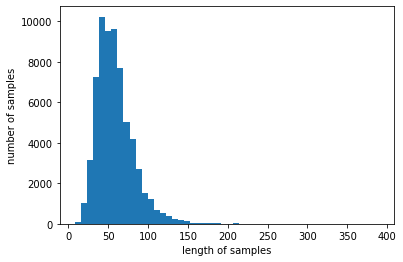

In [80]:
# word2vec 적용 후 데이터 길이 통일 (긴 데이터는 자르고 짧은 데이터는 padding처리)
# 문자열 자를 길이(max_length) 정하기 위해 
# word2vec_corpus_X(word2vec 적용 후 데이터) 내 sentence 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in word2vec_corpus_X))
print('리뷰의 평균 길이 :',sum(map(len, word2vec_corpus_X))/len(word2vec_corpus_X))
plt.hist([len(s) for s in word2vec_corpus_X], bins= 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [81]:
def ratio_of_len_data(input_corpus, length) : 
  count = 0
  for data in input_corpus : 
    if len(data) <= length :
      count += 1
  ratio = round(count/len(input_corpus)*100, 2) 
  tot_data_cnt = len(input_corpus)
  print(f'{length}이하의 길이를 갖는 데이터 개수는 {tot_data_cnt}건 중 {count}건 이고 비율은 {ratio}% 입니다.'); 

In [82]:
# 특정 length 이하의 길이를 갖는 데이터 개수, 차지하는 비율 확인 
ratio_of_len_data(word2vec_corpus_X, 110)

110이하의 길이를 갖는 데이터 개수는 65635건 중 63564건 이고 비율은 96.84% 입니다.


In [83]:
# 최대 문자열 길이(max_length)를 110로 지정
max_data_length = 110

In [84]:
aply_padding_corpus_X = pad_sequences( word2vec_corpus_X, 
                                       maxlen=max_data_length, 
                                       padding='post', 
                                       value=word2index[PAD_TOKEN] )

In [85]:
aply_padding_corpus_X[0]

array([  126,     4,   102,   102,   262,  1021,    52,    20,    20,
          95,   126,     4,   102,   102,   262,  1021,    52,    20,
          20,    95,   134, 34167,    58,    22,    20,    20,    20,
          95,   130,    13,   102,   262,    73,   145,    20,    20,
          95,    62,    42,    10,   165,     4,   102,   262,  1021,
          52,   157,    71,  9446, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168], dtype=int32)

##### Train / Test 데이터 분리 

In [86]:
# train / test 분리
X_train, X_test, y_train, y_test = train_test_split(aply_padding_corpus_X, y, test_size=0.3, random_state=42, stratify=y)

In [87]:
# 배열을 numpy 로 변경
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test  = np.array(X_test)
y_test  = np.array(y_test)

print( len(X_train) )
print( len(X_test) )
print( len(y_train) )
print( len(y_test) )

45944
19691
45944
19691


In [88]:
X_train[800]

array([  449,   286,    50,  1325,  2011,    46,    67,   669,  1325,
        2011,    50,    26,   436,   313,   121,     4,    46,  2563,
          67,   841,   124,   129,    12,  1216,   647,  2011,  1325,
          96,    50,    26,    13,   436,   313,   128,    46,    67,
         669,  1325,  2011,    50,    26,   436,   313,   121,     4,
          46,  2563,    67,   841,   124,   129,    12,  1216,   647,
        2011,  1325,    96,    50,    26,    13,   436,   313,   128,
          46,    86,    46,   914,    67,   129,    12,   669,  1325,
        2011,    50,    26,   436,   313,   121,   841,    86,    46,
        2563,    67,   129, 15934,  1216,   647,  2011,  1325,    96,
          50,    26,   436,   121,    44,   167,    62,   381, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168], dtype=int32)

In [89]:
index = 800
print( [index2word[i] for i in X_train[index]] )
print( X_train[index] )
print( y_train[index] )
print( label_encoder.inverse_transform([y_train[index]]) )

['지연', '부가', '상품', 'VR', '기어', 'G', '요금제', 'GX', 'VR', '기어', '상품', '가입', '무료', '혜택', '적용', '고객', 'G', '플래티넘', '요금제', '노트', '단말', '기변', '후', '분할', '납', '기어', 'VR', '신청', '상품', '가입', '시', '무료', '혜택', '제공', 'G', '요금제', 'GX', 'VR', '기어', '상품', '가입', '무료', '혜택', '적용', '고객', 'G', '플래티넘', '요금제', '노트', '단말', '기변', '후', '분할', '납', '기어', 'VR', '신청', '상품', '가입', '시', '무료', '혜택', '제공', 'G', '단말기', 'G', '프라임', '요금제', '기변', '후', 'GX', 'VR', '기어', '상품', '가입', '무료', '혜택', '적용', '노트', '단말기', 'G', '플래티넘', '요금제', '기변', '이상태', '분할', '납', '기어', 'VR', '신청', '상품', '가입', '무료', '적용', '가능', '것', '부탁', '청자', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
[  449   286    50  1325  2011    46    67   669  1325  2011    50    26
   436   313   121     4    46  2563    67   841   124   129    12  1216
   647  2011  1325    96    50    26    13   436   313   128    46    67
   669  1325  2011    50    26   436   313   121     4    46  2563    67
   841   12

In [90]:
# attention class. 
class Attention(Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        # (batch, )
        self.w1 = Dense(units, activation='tanh')
        self.w2 = Dense(1)    
        self.softmax_ = Softmax(axis=1)
        
    def call(self, x):
        # (batch, seq, embedding_dim*2) -> # (batch, seq, dec_units)
        x = self.w1(x)
        # (batch, seq, dec_units) -> # (batch, seq, 1)
        score = self.softmax_( self.w2(x) )

        return tf.squeeze( tf.matmul(tf.transpose(x, perm=[0, 2, 1]), score ), axis=-1 )

In [91]:
# 차원 테스트
Attention(128)( np.zeros([64, 200, 128*2]) )

<tf.Tensor: shape=(64, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [92]:
# DL 모델. 
class SORClassifier(Model):
    def __init__(self, vocab_size, embedding_dim, dec_units, 
                 batch_size, embedding_weights, apply_attention, train_embedding_layer, dropout, classes):
        super(SORClassifier, self).__init__()
        self.batch_size = batch_size
        self.dec_units = dec_units
        self.embedding = Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_weights])
        self.lstm = Bidirectional( LSTM(self.dec_units, return_sequences=apply_attention) )
        self.fc1 = Dense(128, activation='relu')
        self.fc2 = Dense(classes, activation='softmax')
        self.do1 = Dropout(dropout)
        self.do2 = Dropout(dropout)
        
        self.attention = Attention(self.dec_units)
        self.embedding.trainable = train_embedding_layer
        self.apply_attention = apply_attention
        
    # 단어id 벡터 -> embedding layer -> dropout -> bilstm -> (opt)attention -> fc -> droupout -> fc(softmax)
    def call(self, x):
        # (batch, seq) -> (batch, seq, embedding_dim)        
        x = self.embedding(x)
        x = self.do1(x)
        # (batch, seq, embedding_dim) -> (batch, seq, embedding_dim*2)        
        x = self.lstm(x)
        
        # (batch, seq, embedding_dim*2) -> (batch, embedding_dim)        
        if self.apply_attention:
            x = self.attention(x)
        
        # (batch, embedding_dim) -> (batch, 128)    
        x = self.fc1(x)
        x = self.do2(x)
        x = self.fc2(x)
        
        return x

In [93]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [94]:
# 검증 데이터 손실(val_loss)가 증가하면 과적합 징후므로
# 검증 데이터 손실이 4회 증가하면 학습을 조기종료(Early Stopping)함
# ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우만 모델을 저장
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 4)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_acc', mode = 'max', verbose = 1)

In [95]:
def train_and_evaluate(vocab_size, embedding_dim, dec_units, epochs, batch_size, 
       weights, apply_attention, train_embedding_layer, dropout, classes):
    model = SORClassifier(
        vocab_size, 
        embedding_dim, 
        dec_units, 
        batch_size,
        weights,
        apply_attention,
        train_embedding_layer,
        dropout,
        classes
    )

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2 )
        
    
    test_score = model.evaluate(X_test, y_test, verbose=2)
    
    plot_hist(history)
    
    return history, test_score

Epoch 1/15
575/575 [==============================] - 245s 420ms/step - loss: 1.2402 - accuracy: 0.6564 - val_loss: 0.7608 - val_accuracy: 0.7748
Epoch 2/15
575/575 [==============================] - 241s 420ms/step - loss: 0.7811 - accuracy: 0.7721 - val_loss: 0.6495 - val_accuracy: 0.7975
Epoch 3/15
575/575 [==============================] - 241s 419ms/step - loss: 0.6886 - accuracy: 0.7924 - val_loss: 0.6139 - val_accuracy: 0.8143
Epoch 4/15
575/575 [==============================] - 241s 419ms/step - loss: 0.6337 - accuracy: 0.8059 - val_loss: 0.5746 - val_accuracy: 0.8199
Epoch 5/15
575/575 [==============================] - 241s 419ms/step - loss: 0.5956 - accuracy: 0.8168 - val_loss: 0.5819 - val_accuracy: 0.8257
Epoch 6/15
575/575 [==============================] - 242s 421ms/step - loss: 0.5702 - accuracy: 0.8222 - val_loss: 0.5676 - val_accuracy: 0.8260
Epoch 7/15
575/575 [==============================] - 242s 421ms/step - loss: 0.5403 - accuracy: 0.8316 - val_loss: 0.5283 -

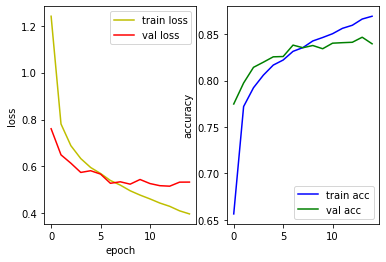

In [96]:
hyper_params = {
    'apply_attention': [True],
    'train_embedding_layer': [False],
    'dropout': [0.3],
    'weights': ['weight']#, 'norm_weight']
}

histories = dict() 
test_scores = dict()

DEC_UNITS = 128
EPOCHS=15
BATCH_SIZE = 64

for a in hyper_params['apply_attention']:
    for te in hyper_params['train_embedding_layer']:
        for do in hyper_params['dropout']:
            for w in hyper_params['weights']:
                vocab_size, embedding_dim = model.wv.vectors.shape
                history, test_score = \
                    train_and_evaluate(vocab_size, 
                                       embedding_dim,
                                       DEC_UNITS,
                                       EPOCHS,
                                       BATCH_SIZE,
                                       model.wv.vectors,
                                       a,  # attention 적용할지?
                                       te, # embedding layer를 훈련시킬지, freezing시킬지?
                                       do, # dropout 비율
                                       len(label_encoder.classes_)) # class 개수
                model_name = f'{a}-{te}-{do}-{w}'
                histories[model_name] = history
                test_scores[model_name] = test_score

In [97]:
test_scores

{'True-False-0.3-weight': [0.5469240546226501, 0.8383525609970093]}

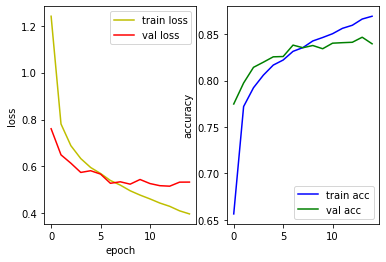

In [98]:
plot_hist(histories["True-False-0.3-weight"])

In [ ]:
model.save('testmodel1.h5')

In [ ]:
def preprocessing_sentence(sentences) :
  sentences = 'Swing 이번달 청구금액에서 할인금액이 이상합니다. 선택약정할인이 왜 덜 적용되었나요? 010-9264-2530 phone call'
  new_sentence = []
  word2vec_X = []
  if sentences is not None and len(sentences.strip()) > 1 : # 문자열 길이가 1 이상인 데이터만 담기 
      sentences = replace_comma_to_space(sentences) ## 콤마 먼저 삭세 처리. 콤마 때문에 리스트로 인식됨
      sentences = split_doc_to_sentences(sentences) ## 문장 분리
      print(sentences)
      for sentence in sentences :
        sentence = preprocess_sent(sentence)
        new_sentence.append(sentence)
      print("after preprocess : ", new_sentence)
      new_sentence = [' '.join(tokenize("mecab", new_sentence, pos = False, tag_filter_aply= True)).split(' ') ]
      print("after tokenize : ", new_sentence)
      for word in new_sentence : 
        word2vec_X.append( get_words_indexes(word)  )
      print("after word2vec : ", word2vec_X)
  aply_padding_corpus_X = pad_sequences( word2vec_X, 
                                            maxlen=110, 
                                            padding='post', 
                                            value=word2index[PAD_TOKEN] )
  return aply_padding_corpus_X[0]


In [ ]:
sop = 'Swing 이번달 청구금액에서 할인금액이 이상합니다. 선택약정할인이 왜 덜 적용되었나요? 010-9264-2530 phone call'

In [ ]:
sop

array([  126,  1345,   567,    65,   106,    80,   106,   227,   111,
          89,   318,   121,  7744,  2737, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168], dtype=int32)

In [ ]:
sop = preprocessing_sentence(sop)

['Swing 이번달 청구금액에서 할인금액이 이상합니다', '선택약정할인이 왜 덜 적용되었나요', '010-9264-2530 phone call']
after preprocess :  ['Swing 이번달 청구금액에서 할인금액이 이상합니다', '선택약정할인이 왜 덜 적용되었나요', 'phone call']
after tokenize :  [['Swing', '이번', '달', '청구', '금액', '할인', '금액', '이상', '선택', '약정', '인', '적용', 'phone', 'call']]
after word2vec :  [[126, 1345, 567, 65, 106, 80, 106, 227, 111, 89, 318, 121, 7744, 2737]]


In [ ]:
sop

array([  126,  1345,   567,    65,   106,    80,   106,   227,   111,
          89,   318,   121,  7744,  2737, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168, 34168,
       34168, 34168], dtype=int32)

In [ ]:
loaded_model = tf.keras.models.load_model('testmodel1')

OSError: ignored

In [ ]:
.predict(sop)

AttributeError: ignored

In [ ]:
def sop_predict(new_sop) :
  
  score = float(loaded_model.predict(pad_new)) # 예측
  if(score > 0.5) : 
    print("{:.2f}% 확률로 긍정 리뷰입니다. \n".format(score*100))
  else : 
    print("{:.2f}% 확률로 부정 리뷰입니다. \n".format((1-score)*100))